# Biodiversity in National Parks

For this project, you will interpret data from the National Parks Service about endangered species in different parks.

You will perform some data analysis on the conservation statuses of these species and investigate if there are any patterns or themes to the types of species that become endangered. During this project, you will analyze, clean up, and plot data as well as pose questions and seek to answer them in a meaningful way.

After you perform your analysis, you will share your findings about the National Park Service.

## Project Objectives:
- Complete a project to add to your portfolio
- Use Jupyter Notebook to communicate findings
- Run an analysis on a set of data
- Become familiar with data analysis workflow

## Prerequisites:
- Data Visualization
- Communicating Data Science Findings

In [1]:
# Load the Libraries
import csv # Python library used for reading and writing tabular data in CSV format.
import pandas as pd # Python library used for working with data sets. It has functions for analyzing, cleaning, exploring, and manipulating data. 
import json # Python library for encoding and decoding custom objects by using JSON encoder and decoder classes.
import numpy as np # Python library for adding support to large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
import seaborn as sns #Python library for statistical visualizations
import statistics as stat #Python library for statistical operations
import matplotlib.pyplot as plt # Python library for creating graphs
from scipy import stats # Python library for linear regression

In [2]:
# Load the Data
observations = pd.read_csv("observations.csv")

# Inspect the Data
print("Head of Observations")
print(observations.head(), "\n")
print("Info of Observations")
print(observations.info(), "\n")
print("Null Values of Observations")
print(observations.isnull().sum(), "\n")

# Find the Value Counts of the National Parks
print("Value Counts of National Parks in Observations")
print(observations["park_name"].value_counts())

Head of Observations
            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85 

Info of Observations
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None 

Null Values of Observations
scientific_name    0
park_name          0
observations       0

We have two datasets to explore, `observations` and `species_info`. 

`observations` contains 3 variables: 
1. `scientific_name` - the scientific name of each species
2. `park_name` - the National Park where the specific species were found
3. `observations` - the number of times each species was observed at the National Park

The `observations` datset contains 23,296 recorded sightings of different species at several national parks for the past 7 days. It doesn't appear to have any null observations.

The `observations` dataset also contains an equal sampling of sightings from each National Park at 5,824 observations each for `Great Smoky Mountains National Park`, `Yosemite National Park`, `Bryce National Park`, and `Yellowstone National Park`. 

In [3]:
# Load the Data
species_info = pd.read_csv("species_info.csv")

# Inspect the Data
print("Head of Species Info")
print(species_info.head(), "\n")
print("Info of Species Info")
print(species_info.info(), "\n")
print("Null Values of Species Info")
print(species_info.isnull().sum(), "\n")

# Find the Value Counts of the National Parks
print("Value Counts of Category in Species Info")
print(species_info["category"].value_counts())

Head of Species Info
  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN   

Info of Species Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 

`species_info` contains 4 variables: 
1. `category` - the class of the animal
2. `scientific_name` - the scientific name of each species
3. `common_name` - the common name of each species
4. `conservation_status` - the species' current conservation status

The `species_info` dataset contains 5,823 observations. It also contains 5,633 `NaN` values, all of which are within the `conservation_status` variable. We will have to dig deeper to determine what are the type of these NaN values.

We also showcase the value counts of each category in `species_info`. There are plant and animal life within the dataset.

In [4]:
# Inspect the NaN Values
print("Head of Non-NaN Values of Species Info")
print(species_info.dropna().head(), "\n")

# Value Counts of Non-NaN Values
print("Value Counts of Non-NaN Values of Species Info")
print(species_info.dropna().conservation_status.value_counts(), "\n")

Head of Non-NaN Values of Species Info
   category            scientific_name       common_names conservation_status
7    Mammal              Canis latrans             Coyote  Species of Concern
8    Mammal                Canis lupus          Gray Wolf          Endangered
9    Mammal                Canis rufus           Red Wolf          Endangered
29   Mammal           Eptesicus fuscus      Big Brown Bat  Species of Concern
30   Mammal  Lasionycteris noctivagans  Silver-Haired Bat  Species of Concern 

Value Counts of Non-NaN Values of Species Info
conservation_status
Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: count, dtype: int64 



The `NaN` values of seem to be of type **Missing Not at Random** (**MNAR**). We believe it to be **MNAR** data because the observations with `NaN` values within the `conservation_status` column contain healthy population numbers and are not on the [endangered list](https://wildanimalhealthfund.org/animalhealth/why-are-animals-endangered/?gad_source=1&gclid=CjwKCAjwt-OwBhBnEiwAgwzrUkErNJJgf_6llpdWnLeGySjxY4_M9HL0Jw3RJ7tMNPO2aFhFB0u4DRoCgewQAvD_BwE). We do not have information for how this dataset was collected and compiled as it was provided by Codecademy's Data Science Portfolio Project. Therefore, we will assume that this specific column's `NaN` values are of **MNAR** type.

In [16]:
species_info.conservation_status.dropna().unique()

array(['Species of Concern', 'Endangered', 'Threatened', 'In Recovery'],
      dtype=object)

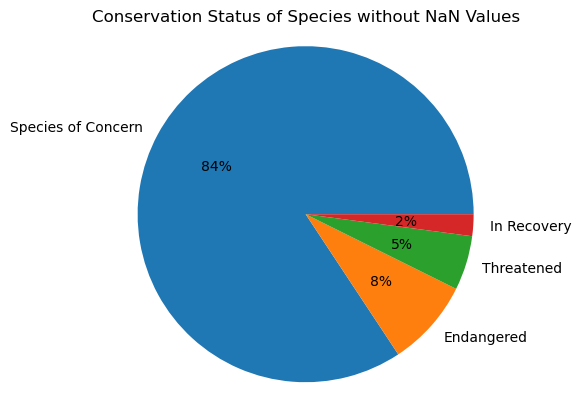

In [33]:
# Pie Chart for Conservation Status
plt.pie(species_info.conservation_status.value_counts(),
       autopct = "%d%%",
       labels = species_info.conservation_status.dropna().unique())

# Create Labels for the Plot
plt.axis("equal")
plt.title("Conservation Status of Species without NaN Values")

# Show and Close the Plot
plt.show()
plt.close()

Using our **domain knowledge** that the `NaN` values within `species_info`'s `conservation_status` are most likely wildlife that are not on the endangered list, we will create a new column, `endangered_list`, to indicate whether the specific species has a conservation status designation. If `conservation_status` is the `NaN` value, then we will assume that species is `Not Endangered`.

In [39]:
# Use a Lambda Function to Find the NaN and Assign as "Not On Conservation List"
species_info["endangered_list"] = species_info["conservation_status"].apply(lambda x: "Not On the Conservation List" if pd.isna(x) else "On the Conservation List")

# Display the Value Counts
print("Value Counts of Non-NaN Values of Species Info")
print(species_info.endangered_list.value_counts())

Value Counts of Non-NaN Values of Species Info
endangered_list
Not On the Conservation List    5633
On the Conservation List         191
Name: count, dtype: int64


Here, we see that there are 5,633 species that do not have a conservation status designation, denoted as `Not Endangered`, and there are 191 species that have a conservation status designation ranging from `Species of Concern`, `Endangered`, `Threatened`, or `In Recovery`. 

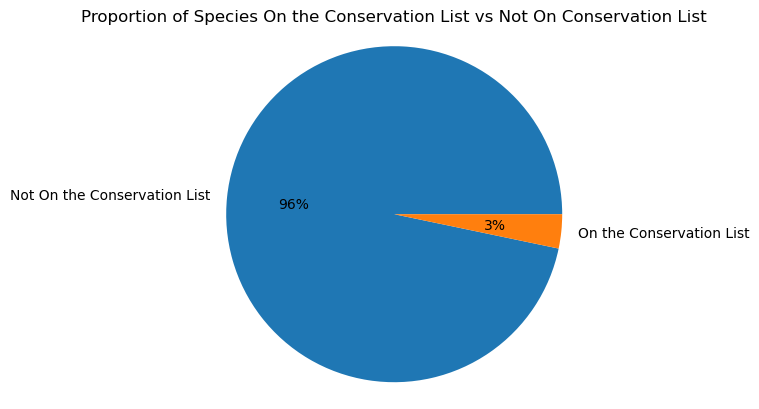

In [40]:
# Pie Chart for Conservation Status
plt.pie(species_info.endangered_list.value_counts(),
       autopct = "%d%%",
       labels = species_info.endangered_list.dropna().unique())

# Create Labels for the Plot
plt.axis("equal")
plt.title("Proportion of Species On the Conservation List vs Not On Conservation List")

# Show and Close the Plot
plt.show()
plt.close()

Above, we see that 96% of the species in our dataset are `Not On the Conservation List` and 3% are `On the Conservation List`. 

In [6]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [7]:
species_info.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
